Prashant Wagh

GRIP TASK:- 2
    the given ‘Iris’ dataset, predict the optimum number of clusters and 
    represent it visually.

# Prediction using Unsupervised ML

In [84]:
# Importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
from sklearn.cluster import KMeans

In [85]:
df=pd.read_csv('Iris.csv')       # read iris data

In [86]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [88]:
df.shape        # dimensions of dataset

(150, 6)

In [89]:
df.isnull().sum()       # check null value in dataset

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [90]:
df.describe()              # descriptive statistics of iris data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Data Visualiazation

In [91]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
df['Species'].value_counts()                   # bar chart for species

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

<AxesSubplot:>

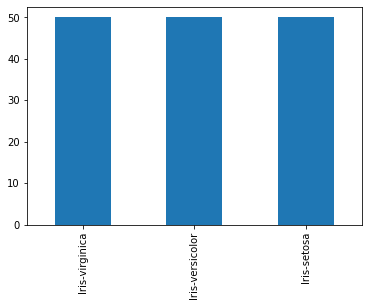

In [93]:
df.Species.value_counts().plot.bar()

<AxesSubplot:ylabel='Species'>

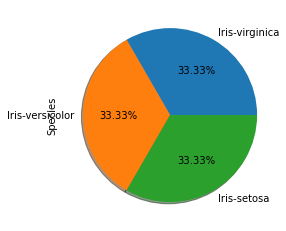

In [94]:
df['Species'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)   # pie chart for species

In [95]:
df.columns        # Column names of dataset 

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [110]:
col=['SepalLengthCm','SepalWidthCm' ,'PetalLengthCm' ,'PetalWidthCm']

Checking the outliers

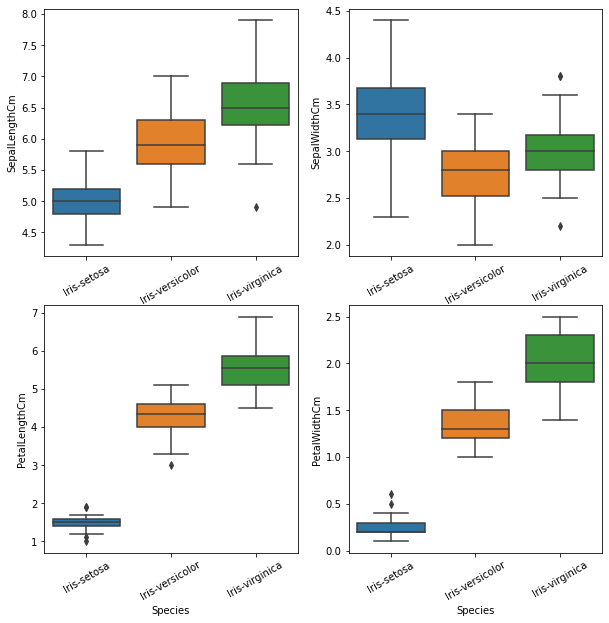

In [111]:
fig , ax=plt.subplots(2,2, figsize=(10,10))
for var,subplot in zip (col, ax.flatten()):
        sn.boxplot(x="Species",y=var,data=df,ax=subplot)          
        for label in subplot.get_xticklabels():
            label.set_rotation(30)

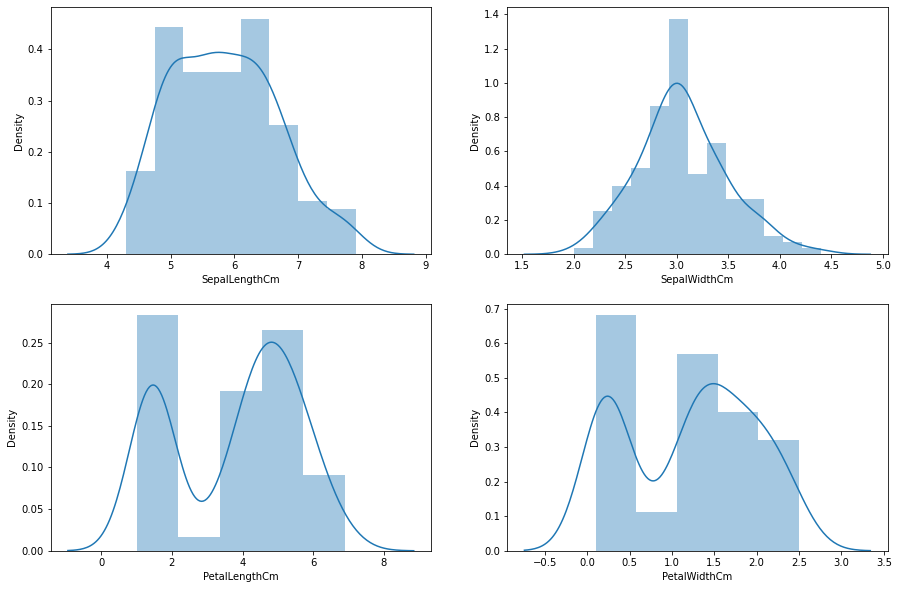

In [96]:
fig , ax = plt.subplots(2, 2 , figsize=(15,10))
for i,subplot in zip(col,ax.flatten()):
    sn.distplot(df[i],ax=subplot)

In [97]:
df.drop(['Id'],axis=1,inplace=True)     # drop Id column

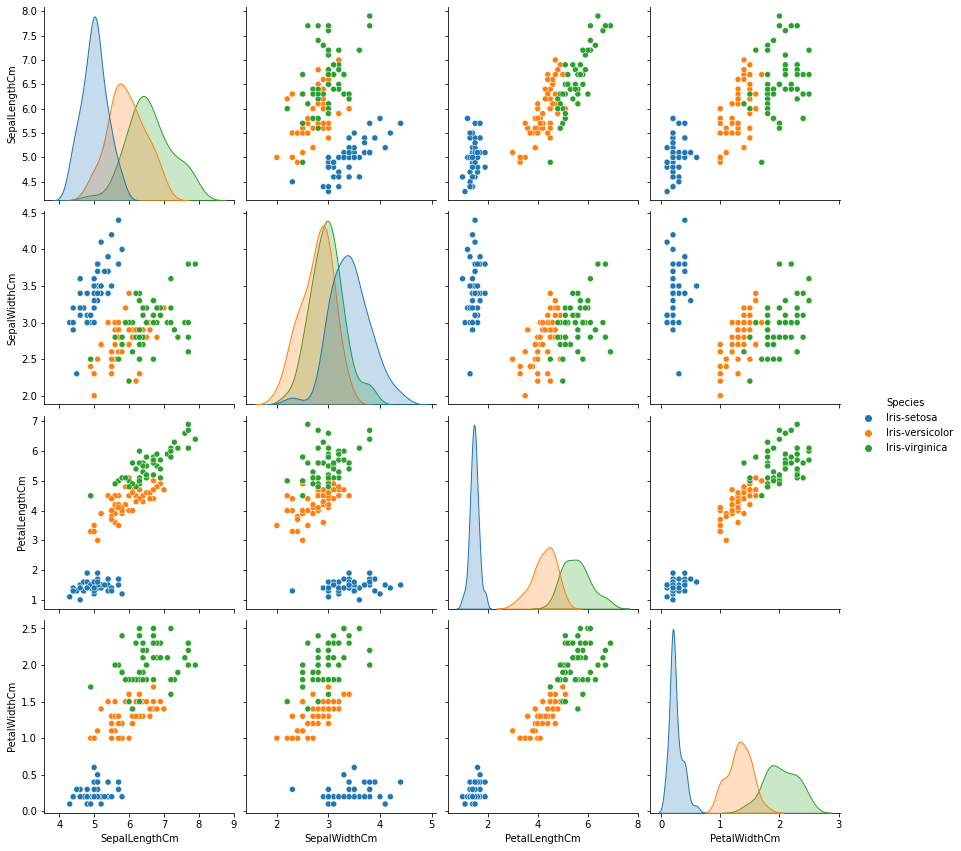

In [98]:
sn.pairplot(df,hue="Species",size=3)   # pairplot 
plt.show()

# Prediction using K-Means Clustering 

In [99]:
x=df.iloc[:,[0,1,2,3]].values

Find the optimum number of Clusters for K-means classfication

In [100]:
w = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    w.append(kmeans.inertia_)

In [101]:
print(w,end='')        

[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.34540931571815, 46.535582051282034, 38.93873974358975, 34.190687924796634, 29.90537429982511, 27.927882157034986, 25.955497086247092]

Using the Elbow method to finding the otimum numbers of clusters for k-means clustring

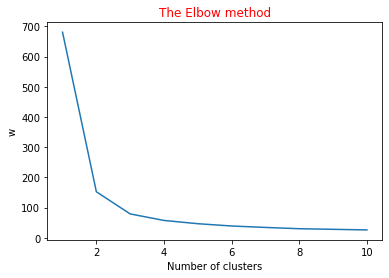

In [102]:
plt.plot(range(1, 11), w)            
plt.title('The Elbow method' , color='RED')
plt.xlabel('Number of clusters')
plt.ylabel('w')                          
plt.show()

Implementing K-means Clustering

In [103]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans      

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# Visualization the Clusters

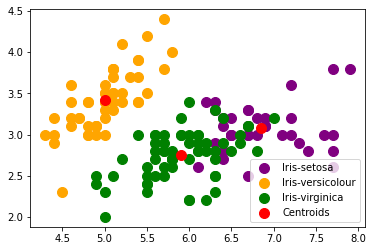

In [106]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100,c='red',label='Centroids')
plt.legend()